# Munich's weather data analysis

In this notebook, we will explore weather data with a focus on:
- TMK: Daily Mean Temperature
- RSK: Daily Precipitation Height

We will learn how to:
1. Import and inspect a dataset,
2. Clean and filter relevant variables,
3. Perform basic statistics,
4. Visualise trends using plots.

Original source: https://www.kaggle.com/code/mexwell/pytorch-forecasting-munich-s-daily-temperature

### 1. Importing and Viewing the Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Upload CSV file
df = pd.read_csv('...', sep=';')  # Replace with actual file path

In [3]:
# View the first few rows
df.head(10)

,STATIONS_ID,MESS_DATUM,QN_3,FX,FM,QN_4,RSK,RSKF,SDK,SHK_TAG,NM,VPM,PM,TMK,UPM,TXK,TNK,TGK,eor
0,3379,19540601,-999,-999.0,-999.0,1,0.0,1,-999.0,0,-999.0,-999.0,-999.0,14.0,-999.0,17.6,10.4,-999.0,eor
1,3379,19540602,-999,-999.0,-999.0,1,0.5,1,-999.0,0,-999.0,-999.0,-999.0,13.2,-999.0,19.7,9.7,-999.0,eor
2,3379,19540603,-999,-999.0,-999.0,1,0.0,1,-999.0,0,-999.0,-999.0,-999.0,16.6,-999.0,21.9,8.2,-999.0,eor
3,3379,19540604,-999,-999.0,-999.0,1,1.2,1,-999.0,0,-999.0,-999.0,-999.0,15.2,-999.0,17.3,11.8,-999.0,eor
4,3379,19540605,-999,-999.0,-999.0,1,6.0,1,-999.0,0,-999.0,-999.0,-999.0,15.2,-999.0,17.7,13.7,-999.0,eor
5,3379,19540606,-999,-999.0,-999.0,1,2.3,1,-999.0,0,-999.0,-999.0,-999.0,12.9,-999.0,17.7,10.9,-999.0,eor
6,3379,19540607,-999,-999.0,-999.0,1,2.9,1,-999.0,0,-999.0,-999.0,-999.0,11.5,-999.0,14.6,8.4,-999.0,eor
7,3379,19540608,-999,-999.0,-999.0,1,0.0,0,-999.0,0,-999.0,-999.0,-999.0,18.0,-999.0,23.4,6.6,-999.0,eor
8,3379,19540609,-999,-999.0,-999.0,1,0.2,1,-999.0,0,-999.0,-999.0,-999.0,20.4,-999.0,26.3,12.0,-999.0,eor
9,3379,19540610,-999,-999.0,-999.0,1,1.0,1,-999.0,0,-999.0,-999.0,-999.0,13.1,-999.0,19.0,11.3,-999.0,eor


### 2. Selecting and Cleaning Relevant Columns

In [4]:
print(df.columns.tolist())

['STATIONS_ID', 'MESS_DATUM', 'QN_3', '  FX', '  FM', 'QN_4', ' RSK', 'RSKF', ' SDK', 'SHK_TAG', '  NM', ' VPM', '  PM', ' TMK', ' UPM', ' TXK', ' TNK', ' TGK', 'eor']


In [ ]:
df.columns = df.columns.str.strip()  # remove whitespace in some column heads
print(df.columns.tolist())           # confirm again

['STATIONS_ID', 'MESS_DATUM', 'QN_3', 'FX', 'FM', 'QN_4', 'RSK', 'RSKF', 'SDK', 'SHK_TAG', 'NM', 'VPM', 'PM', 'TMK', 'UPM', 'TXK', 'TNK', 'TGK', 'eor']


In [6]:
# Let's keep only the columns we care about
selected_cols = ['MESS_DATUM', 'TMK', 'RSK']  # here show the spaces
df_clean = df[selected_cols]

# Convert date to datetime
df_clean['MESS_DATUM'] = pd.to_datetime(df_clean['MESS_DATUM'],format='%Y%m%d') # Convert MESS_DATUM to date
df_clean.set_index('MESS_DATUM', inplace=True)

# Check for missing values
df_clean.isnull().sum()

/var/folders/0w/3b9r5r6x5913rft8nvfkxnth0000gn/T/ipykernel_10339/2021256203.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['MESS_DATUM'] = pd.to_datetime(df_clean['MESS_DATUM'],format='%Y%m%d') # Convert MESS_DATUM to date


TMK    0
RSK    0
dtype: int64

In [7]:
# Drop rows with missing values
df_clean = df_clean.dropna()

### 3. Exploring the Data

In [8]:
# Basic statistics
df_clean.describe()

,TMK,RSK
count,25051.000000,25051.000000
mean,9.612083,2.627951
std,7.908055,5.911350
min,-20.000000,0.000000
25%,3.400000,0.000000
50%,9.900000,0.000000
75%,15.800000,2.600000
max,30.400000,101.600000


In [9]:
# View the first few rows
df_clean.tail(10)

,TMK,RSK
MESS_DATUM,,
2022-12-22,9.3,4.1
2022-12-23,10.5,18.4
2022-12-24,9.5,0.0
2022-12-25,9.6,0.0
2022-12-26,9.1,10.9
2022-12-27,4.5,0.0
2022-12-28,5.1,0.0
2022-12-29,8.9,1.2
2022-12-30,7.4,1.5


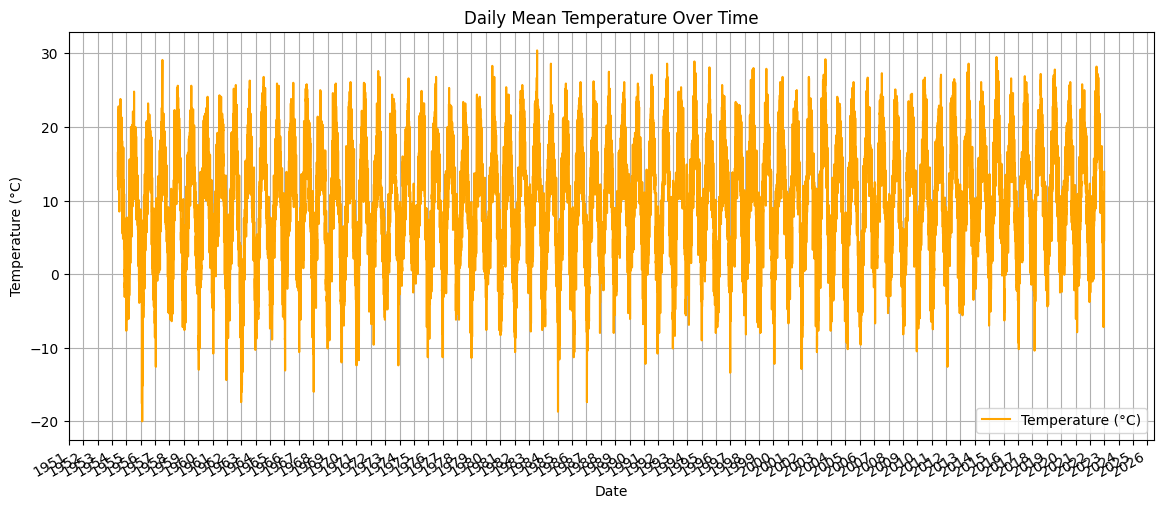

In [10]:
import matplotlib.dates as mdates

plt.figure(figsize=(14, 6))
plt.plot(df_clean.index, df_clean['TMK'], label='Temperature (°C)', color='orange')

# Format x-axis ticks to show years
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gcf().autofmt_xdate()  # Rotate labels

plt.title("Daily Mean Temperature Over Time")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.show()

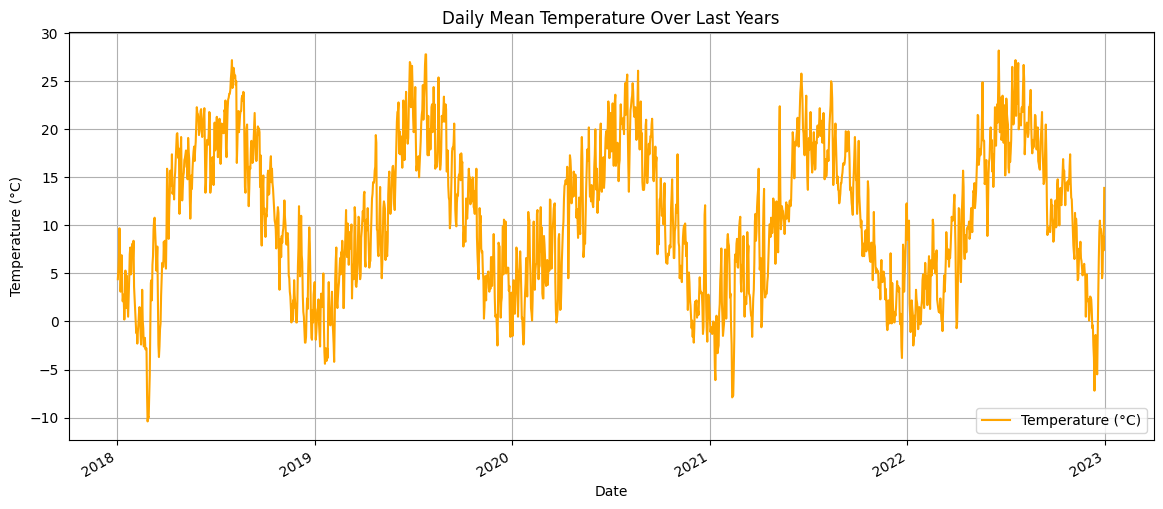

In [ ]:
df_recent = df_clean.tail(1825)  # approx. the last 5 years of daily data

plt.figure(figsize=(14, 6))
plt.plot(df_recent.index, df_recent['TMK'], label='Temperature (°C)', color='orange')

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gcf().autofmt_xdate()

plt.title(f"Daily Mean Temperature Over Last Years")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.show()

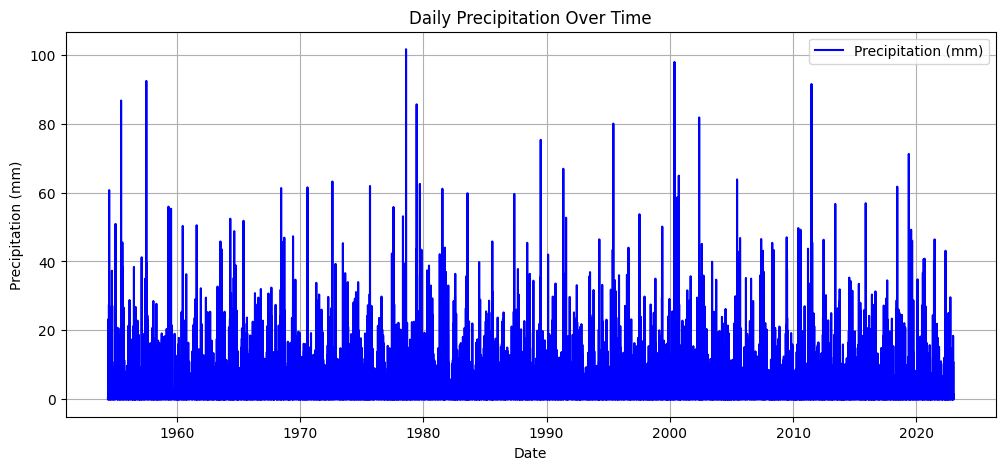

In [13]:
# Line plot of precipitation over time
plt.figure(figsize=(12, 5))
plt.plot(df_clean.index, df_clean['RSK'], label='Precipitation (mm)', color='blue')
plt.title('Daily Precipitation Over Time')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.grid(True)
plt.legend()
plt.show()

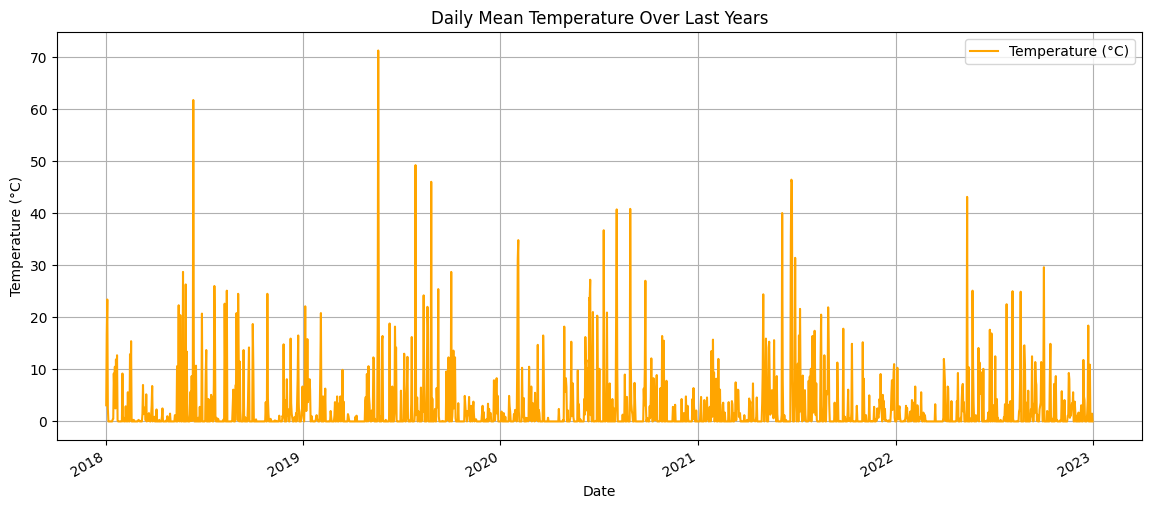

In [ ]:
# Focusing on the past 5 years only stored in df_recent
plt.figure(figsize=(14, 6))
plt.plot(df_recent.index, df_recent['RSK'], label='Temperature (°C)', color='orange')

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gcf().autofmt_xdate()

plt.title(f"Daily Mean Temperature Over Last Years")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.show()

### 4. Histogram & Distribution Plots

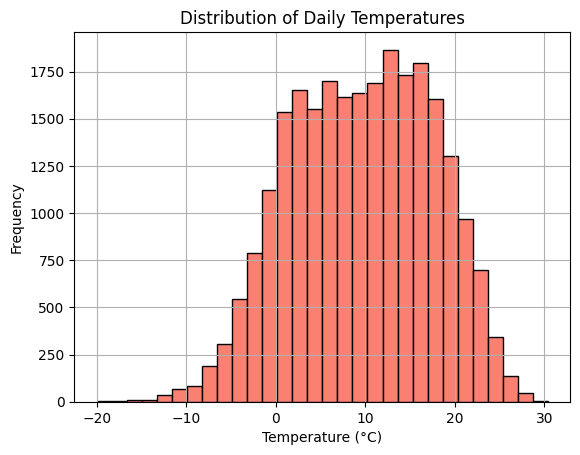

In [16]:
# Histogram of temperature
plt.hist(df_clean['TMK'], bins=30, color='salmon', edgecolor='black')
plt.title('Distribution of Daily Temperatures')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

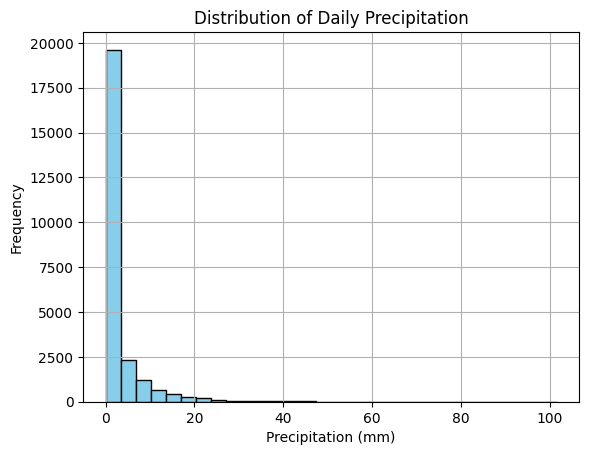

In [17]:
# Histogram of precipitation
plt.hist(df_clean['RSK'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Daily Precipitation')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### 5. Scatter Plot: Temperature vs. Precipitation

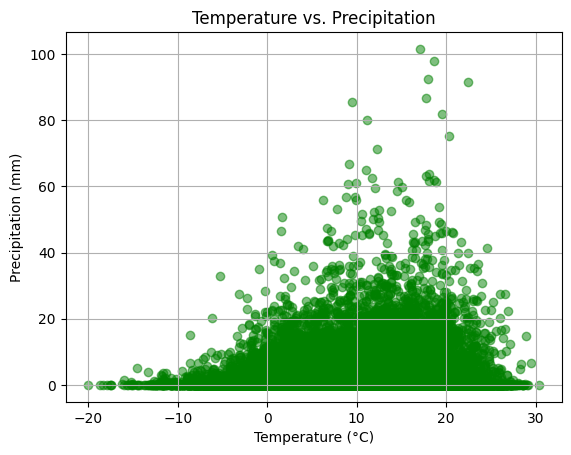

In [18]:
plt.scatter(df_clean['TMK'], df_clean['RSK'], alpha=0.5, color='green')
plt.title('Temperature vs. Precipitation')
plt.xlabel('Temperature (°C)')
plt.ylabel('Precipitation (mm)')
plt.grid(True)
plt.show()

Are rainy days colder or warmer? Are there patterns to investigate?